# FLIGHT PRICE PREDICTION 

Anyone who has booked a flight ticket knows how unexpectedly the prices vary. The cheapest available ticket on a given flight gets more and less expensive over time. This usually happens as an attempt to maximize revenue based on - 
1. Time of purchase patterns (making sure last-minute purchases are expensive) 
2. Keeping the flight as full as they want it (raising prices on a flight which is filling up in order to reduce sales and hold back inventory for those expensive last-minute expensive purchases)

So, you have to work on a project where you collect data of flight fares with other features and work to make a model to predict fares of flights. 

## 1. Data Collection

You have to scrape at least 1500 rows of data. You can scrape more data as well, it’s up to you, More the data better the model 

In this section you have to scrape the data of flights from different websites (yatra.com, skyscanner.com, official websites of airlines, etc). The number of columns for data doesn’t have limit, it’s up to you and your creativity. Generally, these columns are airline name, date of journey, source, destination, route, departure time, arrival time, duration, total stops and the target variable price. You can make changes to it, you can add or you can remove some columns, it completely depends on the website from which you are fetching the data. 
 

## 2. Data Analysis 

After cleaning the data, you have to do some analysis on the data.  

- Do airfares change frequently?
- Do they move in small increments or in large jumps?
- Do they tend to go up or down over time?
- What is the best time to buy so that the consumer can save the most by taking the least risk?
- Does price increase as we get near to departure date?
- Is Indigo cheaper than Jet Airways? 
- Are morning flights expensive? 

## 3. Model Building 

After collecting the data, you need to build a machine learning model. Before model building do all data pre-processing steps. Try different models with different hyper parameters and select the best model. 

##### Follow the complete life cycle of data science. Include all the steps like 

1. Data Cleaning 
2. Exploratory Data Analysis 
3. Data Pre-processing
4. Model Building
5. Model Evaluation
6. Selecting the best model 

# Data Analysis And Model Building

In [1]:
#import all needed libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import datetime
from scipy.stats import zscore
 
import warnings
warnings.filterwarnings('ignore')

In [2]:
#load fight_price.csv file
df=pd.read_csv('flight_price.csv')

In [3]:
#display the top 5 rows of dataset
df.head()

,Unnamed: 0,Airlines,Aeroplane,Dept_time,Arrival_time,Source,Destination,Duration,Stops,Date,Price
0,0,Go First,G8-717/537,17:05,21:10,New Delhi,Mumbai,4h 05m,1 Stop,"Thu, 21 Jul 2022",7108
1,1,Vistara,UK-951,14:20,16:30,New Delhi,Mumbai,2h 10m,Non Stop,"Thu, 21 Jul 2022",8578
2,2,Vistara,UK-933,15:30,17:40,New Delhi,Mumbai,2h 10m,Non Stop,"Thu, 21 Jul 2022",8578
3,3,IndiGo,6E-5318,17:00,19:05,New Delhi,Mumbai,2h 05m,Non Stop,"Thu, 21 Jul 2022",8579
4,4,IndiGo,6E-2519,23:35,01:40,New Delhi,Mumbai,2h 05m,Non Stop,"Thu, 21 Jul 2022",8579


In [4]:
#check the shape of dataset
df.shape

(2457, 11)

In [5]:
#All variable names
df.columns

Index(['Unnamed: 0', 'Airlines', 'Aeroplane', 'Dept_time', 'Arrival_time',
       'Source', 'Destination', 'Duration', 'Stops', 'Date', 'Price'],
      dtype='object')

In [6]:
#Check the datatype of all variables
df.dtypes

Unnamed: 0       int64
Airlines        object
Aeroplane       object
Dept_time       object
Arrival_time    object
Source          object
Destination     object
Duration        object
Stops           object
Date            object
Price            int64
dtype: object

In [7]:
#Unnamed: 0 variable is unwanted column so drop that column from dataset
df.drop('Unnamed: 0',inplace=True,axis=1)

In [8]:
#check the information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2457 entries, 0 to 2456
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Airlines      2457 non-null   object
 1   Aeroplane     2457 non-null   object
 2   Dept_time     2457 non-null   object
 3   Arrival_time  2457 non-null   object
 4   Source        2457 non-null   object
 5   Destination   2457 non-null   object
 6   Duration      2457 non-null   object
 7   Stops         2457 non-null   object
 8   Date          2457 non-null   object
 9   Price         2457 non-null   int64 
dtypes: int64(1), object(9)
memory usage: 192.1+ KB


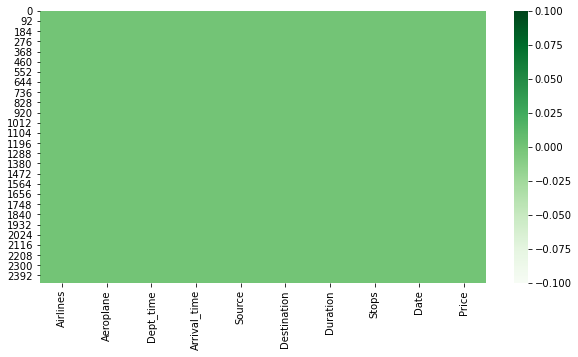

In [9]:
#check null values in dataset by using heatmap
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(),cmap='Greens');

In [10]:
#check the null values and count them
df.isnull().sum()

Airlines        0
Aeroplane       0
Dept_time       0
Arrival_time    0
Source          0
Destination     0
Duration        0
Stops           0
Date            0
Price           0
dtype: int64

### Exploratory Data Analysis(EDA)

In [11]:
for i in df.columns:
    if df[i].dtypes=='object':
        print(df[i].value_counts())
        print('****************************************************')

Vistara         793
IndiGo          681
Air India       573
Go First        189
SpiceJet        134
Air Asia         80
Alliance Air      4
StarAir           3
Name: Airlines, dtype: int64
****************************************************
I5-974            5
G8-285            5
G8-320/345        4
UK-818            4
6E-5025           4
                 ..
SG-8211/454       1
AI-663/884        1
UK-822/952/855    1
6E-184/5302       1
AI-639            1
Name: Aeroplane, Length: 1466, dtype: int64
****************************************************
13:20    90
21:55    53
17:00    53
21:20    51
07:00    49
         ..
04:50     1
04:45     1
08:10     1
10:40     1
02:30     1
Name: Dept_time, Length: 217, dtype: int64
****************************************************
19:10    61
08:55    52
00:05    47
22:40    47
22:20    41
         ..
07:45     1
03:20     1
16:00     1
18:55     1
08:30     1
Name: Arrival_time, Length: 218, dtype: int64
***********************************

### Data visulization

#### Univariant Analysis

In [12]:
df.dtypes

Airlines        object
Aeroplane       object
Dept_time       object
Arrival_time    object
Source          object
Destination     object
Duration        object
Stops           object
Date            object
Price            int64
dtype: object

###### Stops

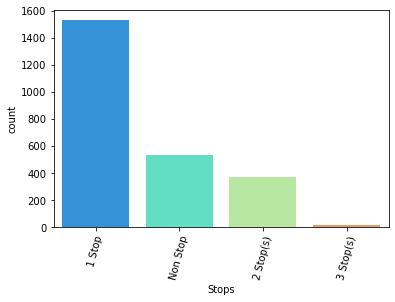

In [13]:
#count plot of stop variable
sns.countplot(df['Stops'],palette='rainbow')
plt.xticks(rotation=75);

###### Airlines

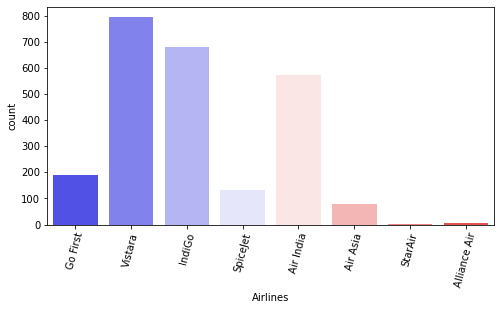

In [14]:
#count plot of Aeroplane variable
plt.figure(figsize=(8,4))
sns.countplot(df['Airlines'],palette='bwr')
plt.xticks(rotation=75);

###### Source

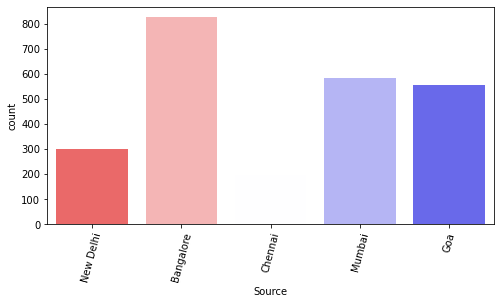

In [15]:
#count plot of source variable
plt.figure(figsize=(8,4))
sns.countplot(df['Source'],palette='bwr_r')
plt.xticks(rotation=75);

###### Destination

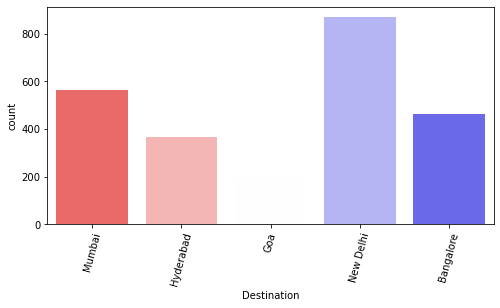

In [16]:
#count plot of destination variable
plt.figure(figsize=(8,4))
sns.countplot(df['Destination'],palette='bwr_r')
plt.xticks(rotation=75);

###### Price

<AxesSubplot:xlabel='Price'>

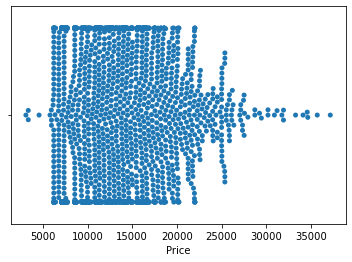

In [17]:
sns.swarmplot(x='Price',data=df)

###### Duration_hours

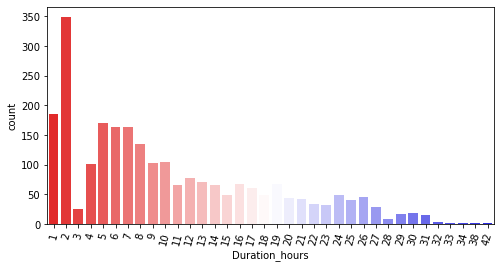

In [50]:
#count plot of destination variable
plt.figure(figsize=(8,4))
sns.countplot(df['Duration_hours'],palette='bwr_r')
plt.xticks(rotation=75);

###### Duration_minutes

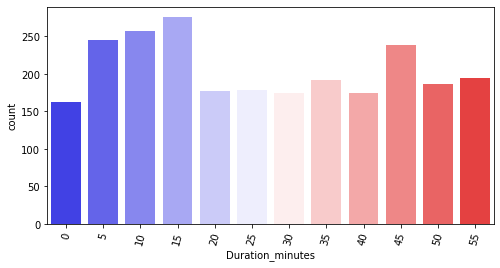

In [51]:
#count plot of destination variable
plt.figure(figsize=(8,4))
sns.countplot(df['Duration_minutes'],palette='bwr')
plt.xticks(rotation=75);

#### Bai Variants Analysis

###### Airline vs Price

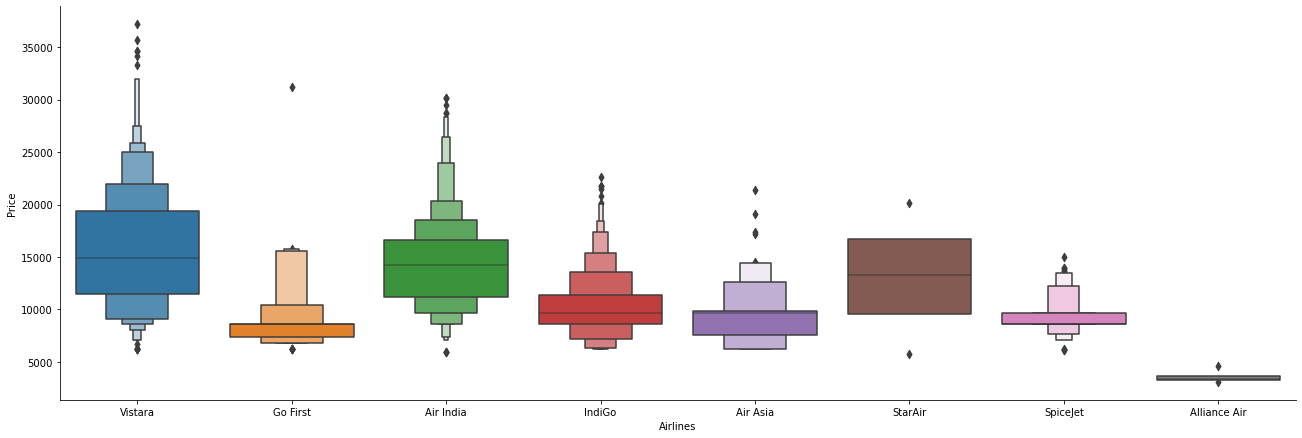

In [52]:
# Airline vs Price
sns.catplot(y = "Price", x = "Airlines", data = df.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

###### Source vs Price

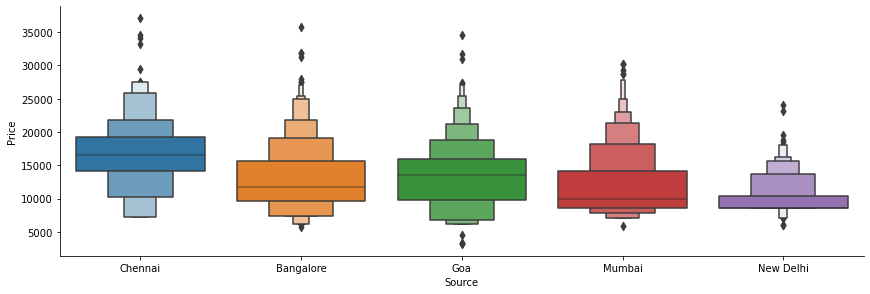

In [53]:
sns.catplot(y = "Price", x = "Source", data = df.sort_values("Price", ascending = False), kind="boxen", height = 4, aspect = 3)
plt.show()

###### Destination vs Price

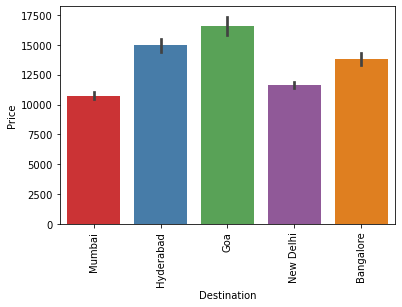

In [54]:
sns.barplot(x='Destination',y='Price',data=df,dodge=True,palette='Set1')
plt.xticks(rotation=90)
plt.show()

###### Total_Stops vs Price

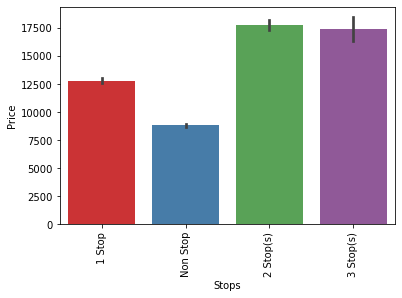

In [55]:
sns.barplot(x='Stops',y='Price',data=df,dodge=True,palette='Set1')
plt.xticks(rotation=90)
plt.show()

###### Day_of_journey vs Price

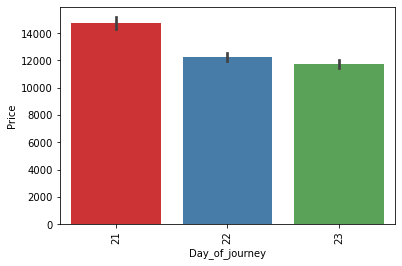

In [56]:
sns.barplot(x='Day_of_journey',y='Price',data=df,dodge=True,palette='Set1')
plt.xticks(rotation=90)
plt.show()

###### Duration_hours vs Price

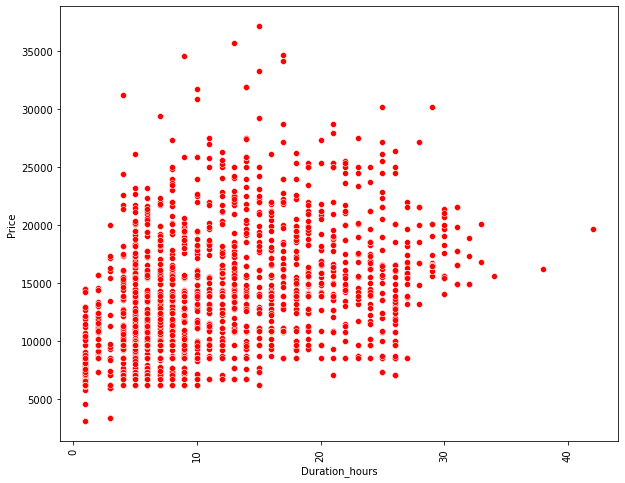

In [57]:
plt.figure(figsize = (10,8))
sns.scatterplot(x='Duration_hours',y='Price',data=df,color='r')
plt.xticks(rotation=90)
plt.show()

###### Duration_minutes vs Price

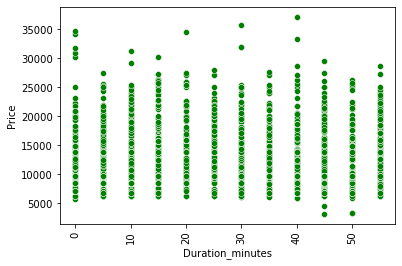

In [58]:
sns.scatterplot(x='Duration_minutes',y='Price',data=df,color='g')
plt.xticks(rotation=90)
plt.show()

###### Scatter plot

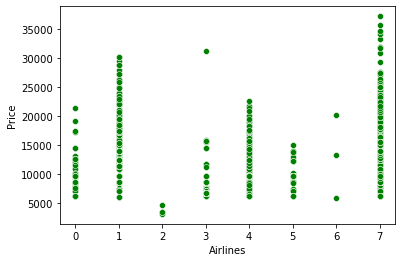

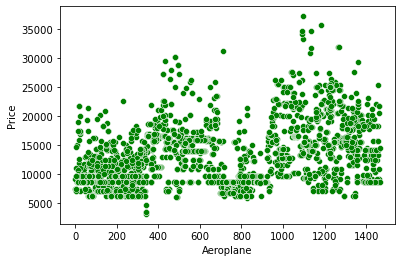

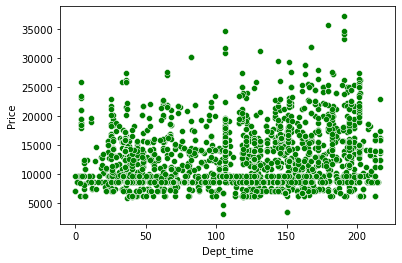

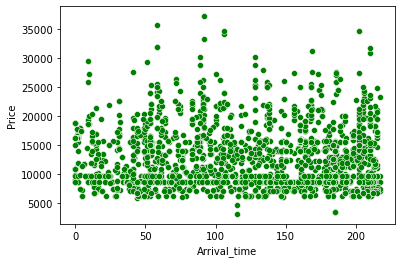

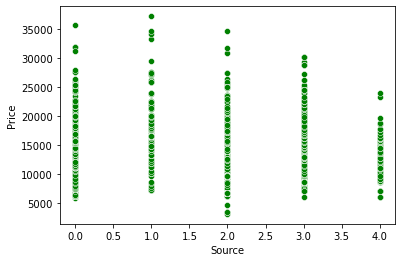

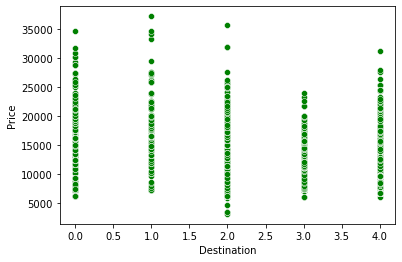

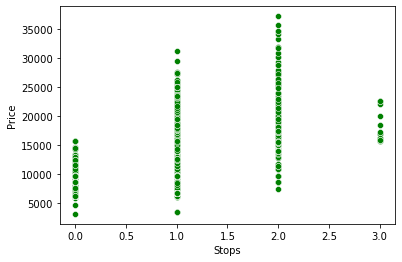

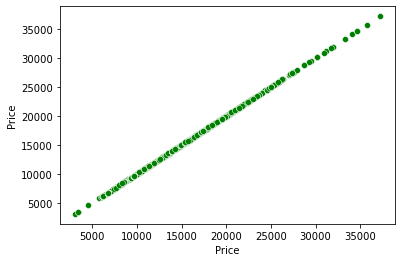

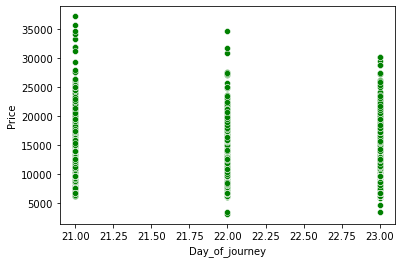

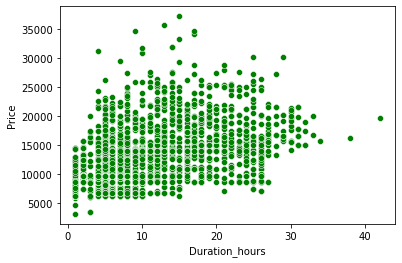

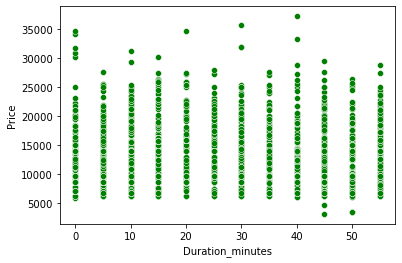

In [59]:
for i in df1.columns:
    plt.figure()
    sns.scatterplot(df1[i],df1['Price'],color='g')

###### Data Preprocessing

In [19]:
df['Date']=df['Date'].replace('Sat, 23 Jul 2022','23/7/2022')
df['Date']=df['Date'].replace('Fri, 22 Jul 2022','22/7/2022')
df['Date']=df['Date'].replace('Thu, 21 Jul 2022','21/7/2022')

In [20]:
df['Date']

0       21/7/2022
1       21/7/2022
2       21/7/2022
3       21/7/2022
4       21/7/2022
          ...    
2452    23/7/2022
2453    23/7/2022
2454    23/7/2022
2455    23/7/2022
2456    23/7/2022
Name: Date, Length: 2457, dtype: object

In [21]:
df['Day_of_journey']=pd.to_datetime(df.Date,format="%d/%m/%Y").dt.day

In [22]:
df['Month_of_journey']=pd.to_datetime(df.Date,format="%d/%m/%Y").dt.month

In [23]:
df['Year_of_journey']=pd.to_datetime(df.Date,format="%d/%m/%Y").dt.year

In [24]:
#now drop the Date Column in dataset
df.drop('Date',inplace=True,axis=1)

In [25]:
df.head()

,Airlines,Aeroplane,Dept_time,Arrival_time,Source,Destination,Duration,Stops,Price,Day_of_journey,Month_of_journey,Year_of_journey
0,Go First,G8-717/537,17:05,21:10,New Delhi,Mumbai,4h 05m,1 Stop,7108,21,7,2022
1,Vistara,UK-951,14:20,16:30,New Delhi,Mumbai,2h 10m,Non Stop,8578,21,7,2022
2,Vistara,UK-933,15:30,17:40,New Delhi,Mumbai,2h 10m,Non Stop,8578,21,7,2022
3,IndiGo,6E-5318,17:00,19:05,New Delhi,Mumbai,2h 05m,Non Stop,8579,21,7,2022
4,IndiGo,6E-2519,23:35,01:40,New Delhi,Mumbai,2h 05m,Non Stop,8579,21,7,2022


In [26]:
#count unique of date of journey variable
df['Day_of_journey'].value_counts()

23    930
22    867
21    660
Name: Day_of_journey, dtype: int64

In [27]:
#count unique of month of journey variable
df['Month_of_journey'].value_counts()

7    2457
Name: Month_of_journey, dtype: int64

In [28]:
#count unique of Year of journey column
df['Year_of_journey'].value_counts()

2022    2457
Name: Year_of_journey, dtype: int64

In [29]:
#Only one month and one year so drop those columns from dataset
df.drop('Month_of_journey',inplace=True,axis=1)
df.drop('Year_of_journey',inplace=True,axis=1)

In [30]:
#display the head of dataset
df.head()

,Airlines,Aeroplane,Dept_time,Arrival_time,Source,Destination,Duration,Stops,Price,Day_of_journey
0,Go First,G8-717/537,17:05,21:10,New Delhi,Mumbai,4h 05m,1 Stop,7108,21
1,Vistara,UK-951,14:20,16:30,New Delhi,Mumbai,2h 10m,Non Stop,8578,21
2,Vistara,UK-933,15:30,17:40,New Delhi,Mumbai,2h 10m,Non Stop,8578,21
3,IndiGo,6E-5318,17:00,19:05,New Delhi,Mumbai,2h 05m,Non Stop,8579,21
4,IndiGo,6E-2519,23:35,01:40,New Delhi,Mumbai,2h 05m,Non Stop,8579,21


In [31]:
# Assigning and converting Duration column into list
duration=list(df['Duration'])

for i in range(len(duration)):
    if duration[i].split() != 2: # Check if duration contains only hour or mins
        if 'h' in duration[i]:
            duration[i]=duration[i].strip() + " 0m"  # Adds 0 minute
        else:
            duration[i]="0h " + duration[i]           # Adds 0 hours
            
duration_hours=[]
duration_minutes=[]

for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep="h")[0]))
    duration_minutes.append(int(duration[i].split(sep="m")[0].split()[-1]))

In [32]:
df['Duration_hours']=duration_hours
df['Duration_minutes']=duration_minutes

In [33]:
#drop the Duration Column from dataset
df.drop('Duration',inplace=True,axis=1)

In [34]:
df.head()

,Airlines,Aeroplane,Dept_time,Arrival_time,Source,Destination,Stops,Price,Day_of_journey,Duration_hours,Duration_minutes
0,Go First,G8-717/537,17:05,21:10,New Delhi,Mumbai,1 Stop,7108,21,4,5
1,Vistara,UK-951,14:20,16:30,New Delhi,Mumbai,Non Stop,8578,21,2,10
2,Vistara,UK-933,15:30,17:40,New Delhi,Mumbai,Non Stop,8578,21,2,10
3,IndiGo,6E-5318,17:00,19:05,New Delhi,Mumbai,Non Stop,8579,21,2,5
4,IndiGo,6E-2519,23:35,01:40,New Delhi,Mumbai,Non Stop,8579,21,2,5


In [35]:
df['Stops'].value_counts()

1 Stop       1531
Non Stop      535
2 Stop(s)     372
3 Stop(s)      19
Name: Stops, dtype: int64

In [36]:
#create duplicate dataset
df1=df.copy()

In [37]:
#Stops variable convert object to integer
df1['Stops']=df1['Stops'].replace('Non Stop',0)
df1['Stops']=df1['Stops'].replace('1 Stop',1)
df1['Stops']=df1['Stops'].replace('2 Stop(s)',2)
df1['Stops']=df1['Stops'].replace('3 Stop(s)',3)

In [38]:
#check datatypes of all variables
df1.dtypes

Airlines            object
Aeroplane           object
Dept_time           object
Arrival_time        object
Source              object
Destination         object
Stops                int64
Price                int64
Day_of_journey       int64
Duration_hours       int64
Duration_minutes     int64
dtype: object

In [39]:
#import label encoder
from sklearn.preprocessing import LabelEncoder

#load label encoder
label=LabelEncoder()

#apply label Encoder for object variable
object_variables=['Airlines','Aeroplane','Dept_time','Arrival_time','Source','Destination']

#apply label Encoder
for var in object_variables:
    df1[var]=label.fit_transform(df1[var])

In [40]:
#check the all datatypes in dataset
df1.dtypes

Airlines            int32
Aeroplane           int32
Dept_time           int32
Arrival_time        int32
Source              int32
Destination         int32
Stops               int64
Price               int64
Day_of_journey      int64
Duration_hours      int64
Duration_minutes    int64
dtype: object

#### Statistic

In [41]:
#describe dataset
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Airlines,2457.0,4.115181,2.378343,0.0,1.0,4.0,7.0,7.0
Aeroplane,2457.0,690.196581,429.690590,0.0,306.0,670.0,1063.0,1465.0
Dept_time,2457.0,118.646724,59.205349,0.0,65.0,127.0,166.0,216.0
Arrival_time,2457.0,120.419617,64.405128,0.0,62.0,128.0,179.0,217.0
Source,2457.0,1.729752,1.441101,0.0,0.0,2.0,3.0,4.0
Destination,2457.0,2.482295,1.498028,0.0,1.0,3.0,4.0,4.0
Stops,2457.0,0.949125,0.630599,0.0,1.0,1.0,1.0,3.0
Price,2457.0,12731.969882,4961.417153,3094.0,8579.0,11382.0,15708.0,37176.0
Day_of_journey,2457.0,22.109890,0.797065,21.0,21.0,22.0,23.0,23.0
Duration_hours,2457.0,10.304843,7.939323,1.0,4.0,8.0,16.0,42.0


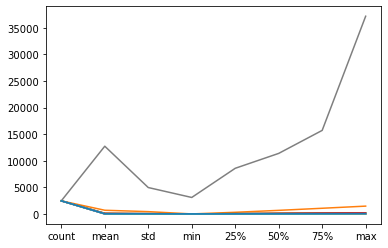

In [42]:
plt.plot(df1.describe());

#### Correlation

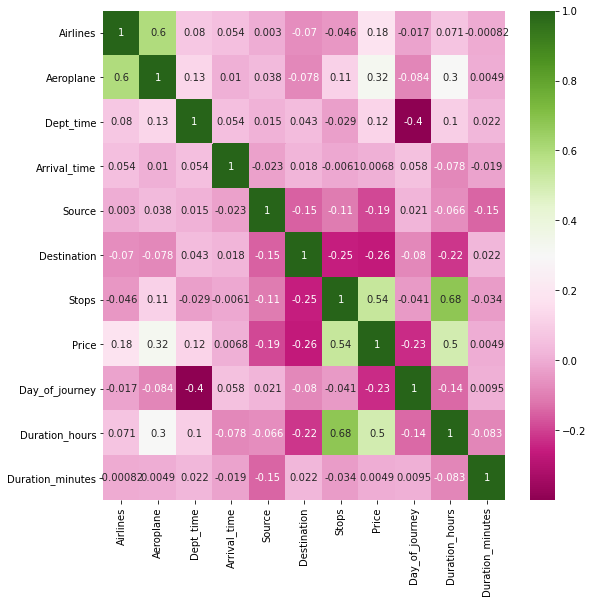

In [43]:
#check the correlation of variables each other by using heat map
plt.figure(figsize=(9,9))
sns.heatmap(df1.corr(),annot=True,cmap='PiYG');

In [44]:
#check correlation of variables each other 
df1.corr()

,Airlines,Aeroplane,Dept_time,Arrival_time,Source,Destination,Stops,Price,Day_of_journey,Duration_hours,Duration_minutes
Airlines,1.000000,0.600172,0.080077,0.053955,0.003027,-0.069768,-0.046044,0.176904,-0.017419,0.070592,-0.000821
Aeroplane,0.600172,1.000000,0.129671,0.009987,0.038067,-0.078066,0.112949,0.323069,-0.083556,0.304794,0.004944
Dept_time,0.080077,0.129671,1.000000,0.054425,0.014743,0.043175,-0.029436,0.123427,-0.398651,0.102430,0.022159
Arrival_time,0.053955,0.009987,0.054425,1.000000,-0.023028,0.017749,-0.006141,0.006763,0.058469,-0.077523,-0.018581
Source,0.003027,0.038067,0.014743,-0.023028,1.000000,-0.150085,-0.108777,-0.190582,0.020902,-0.066391,-0.146085
Destination,-0.069768,-0.078066,0.043175,0.017749,-0.150085,1.000000,-0.254179,-0.263947,-0.080211,-0.215208,0.022082
Stops,-0.046044,0.112949,-0.029436,-0.006141,-0.108777,-0.254179,1.000000,0.538631,-0.040717,0.680228,-0.034207
Price,0.176904,0.323069,0.123427,0.006763,-0.190582,-0.263947,0.538631,1.000000,-0.230453,0.498680,0.004883
Day_of_journey,-0.017419,-0.083556,-0.398651,0.058469,0.020902,-0.080211,-0.040717,-0.230453,1.000000,-0.141443,0.009458
Duration_hours,0.070592,0.304794,0.102430,-0.077523,-0.066391,-0.215208,0.680228,0.498680,-0.141443,1.000000,-0.083217


In [45]:
#check the correlation of target variable with other variables
df_target=df1.corr()
df_target['Price'].sort_values(ascending=False)

Price               1.000000
Stops               0.538631
Duration_hours      0.498680
Aeroplane           0.323069
Airlines            0.176904
Dept_time           0.123427
Arrival_time        0.006763
Duration_minutes    0.004883
Source             -0.190582
Day_of_journey     -0.230453
Destination        -0.263947
Name: Price, dtype: float64

### Check the Outliers and Skewness in Data

In [46]:
x=df1.drop('Price',axis=1)
y=df1['Price']

In [47]:
print(x.shape)
print(y.shape)

(2457, 10)
(2457,)


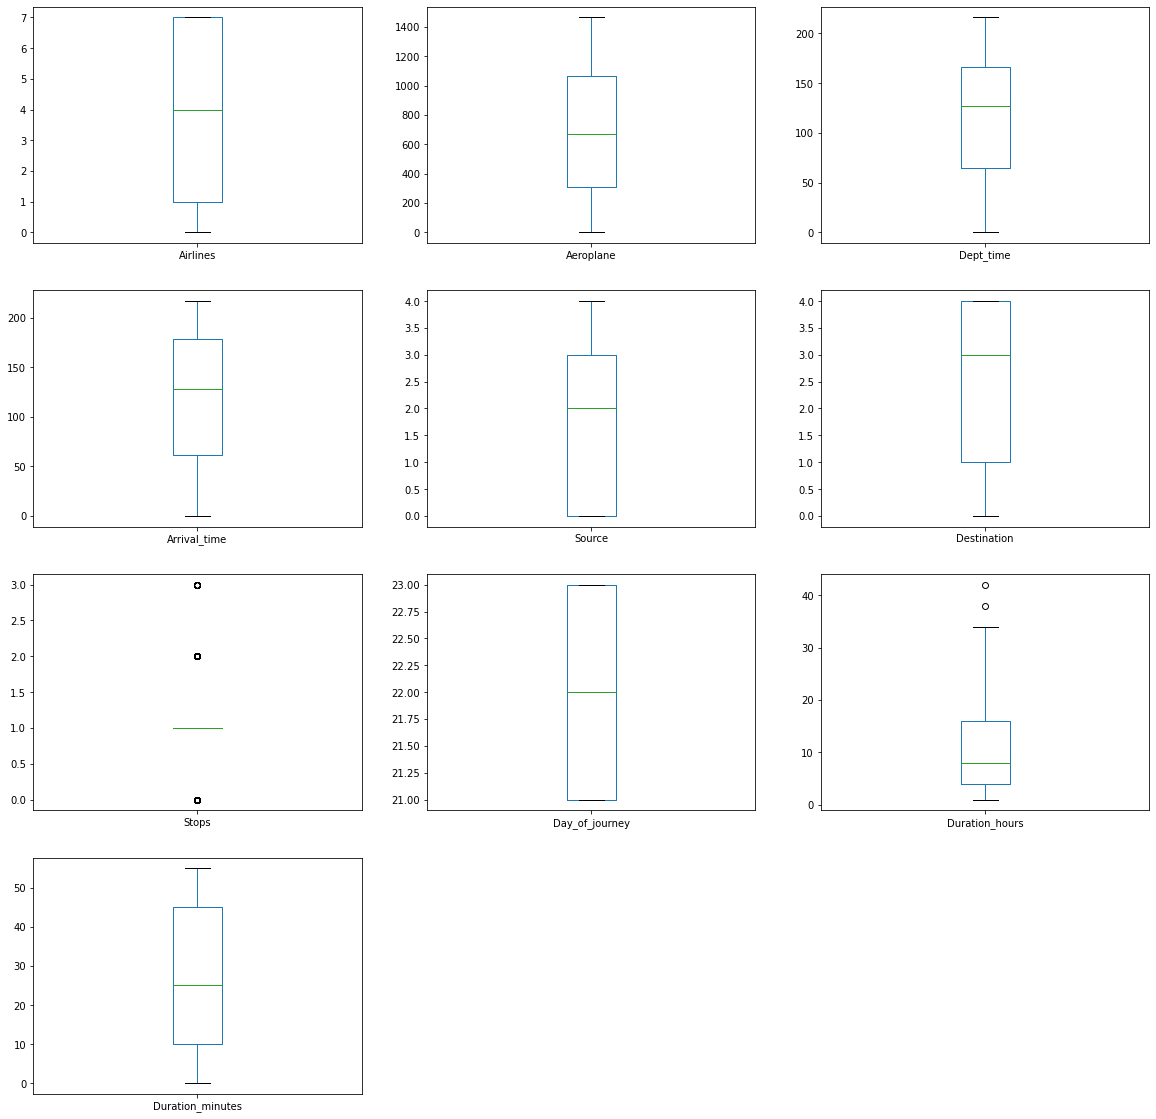

In [48]:
#check the outliers using boxplot
x.plot(kind='box',subplots=True,layout=(4,3),figsize=(20,20));

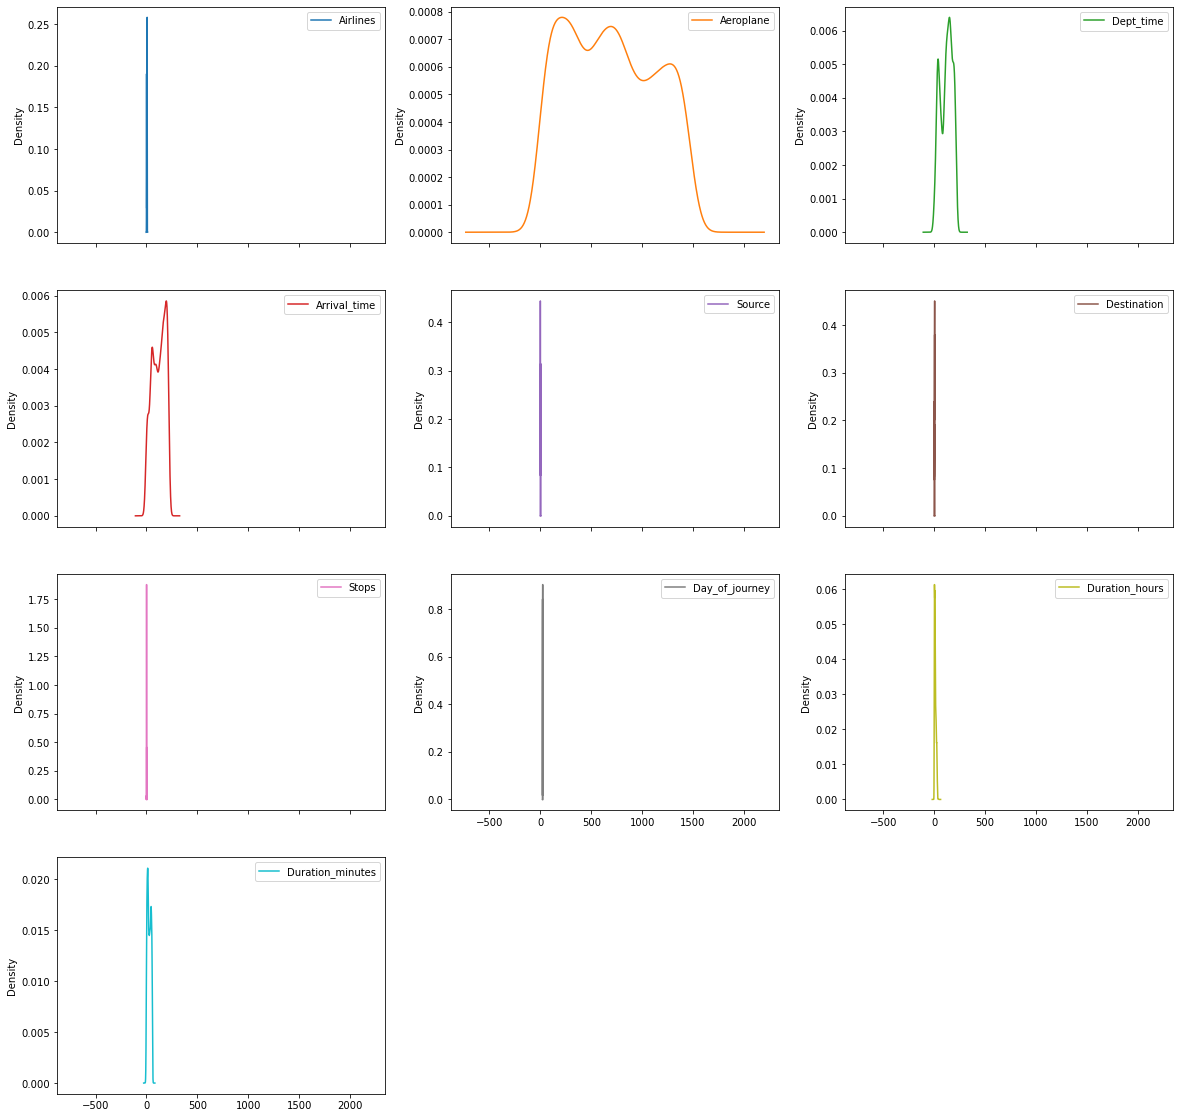

In [49]:
#check the skewness using density plot
x.plot(kind='density',subplots=True,layout=(4,3),figsize=(20,20));

### variance inflation factor

In [60]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [61]:
def vif():
    vif=pd.DataFrame()
    vif['Variables']=x.columns
    vif['VIF factor']=[variance_inflation_factor(x.values,i)for i in range(x.shape[1])]
    return vif

In [62]:
vif()

,Variables,VIF factor
0,Airlines,6.479928
1,Aeroplane,6.381772
2,Dept_time,5.051095
3,Arrival_time,4.620225
4,Source,2.630138
5,Destination,4.122827
6,Stops,6.567432
7,Day_of_journey,22.616159
8,Duration_hours,5.812729
9,Duration_minutes,3.516388


### Standard Scale

In [63]:
from sklearn.preprocessing import MinMaxScaler

In [65]:
scale=MinMaxScaler()

In [66]:
x=scale.fit_transform(x)

## Model Selection

In [95]:
#models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import BaggingRegressor

#Lasso , Ridge Regressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

#metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

#model selection
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score

In [76]:
lr=LinearRegression()
dtr=DecisionTreeRegressor()
knr=KNeighborsRegressor()
rfr=RandomForestRegressor()
abr=AdaBoostRegressor()
gbr=GradientBoostingRegressor()
lasso=Lasso()
ridge=Ridge()
etr=ExtraTreesRegressor()
br=BaggingRegressor()

In [86]:
models=[lr,dtr,knr,rfr,abr,gbr,lasso,ridge,etr,br]

#### LinearRegression

In [70]:
maxscore=0
rnum=0

for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
    lr.fit(x_train,y_train)
    score=lr.score(x_train,y_train)
    if maxscore<score:
        maxscore=score
        rnum=i
print('Score:',maxscore,'Random number:',rnum)

Score: 0.46623926319212383 Random number: 94


In [78]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=94)
lr.fit(x_train,y_train)
pred=lr.predict(x_test)
print('mean_absolute_error:',mean_absolute_error(pred,y_test))
print('mean_squared_error:',mean_squared_error(pred,y_test))
print('r2_score:',r2_score(pred,y_test))

mean_absolute_error: 3026.7478269844737
mean_squared_error: 15792779.30430031
r2_score: -0.5029589933970227


#### DecisionTreeRegressor

In [79]:
maxscore=0
rnum=0

for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
    dtr.fit(x_train,y_train)
    score=dtr.score(x_train,y_train)
    if maxscore<score:
        maxscore=score
        rnum=i
print('Score:',maxscore,'Random number:',rnum)

Score: 1.0 Random number: 1


In [80]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=1)
dtr.fit(x_train,y_train)
pred=dtr.predict(x_test)
print('mean_absolute_error:',mean_absolute_error(pred,y_test))
print('mean_squared_error:',mean_squared_error(pred,y_test))
print('r2_score:',r2_score(pred,y_test))

mean_absolute_error: 1949.1443089430895
mean_squared_error: 14711561.50203252
r2_score: 0.4123868886300329


#### KNeighborsRegressor

In [81]:
maxscore=0
rnum=0

for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
    knr.fit(x_train,y_train)
    score=knr.score(x_train,y_train)
    if maxscore<score:
        maxscore=score
        rnum=i
print('Score:',maxscore,'Random number:',rnum)

Score: 0.7448018227633859 Random number: 151


In [82]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=151)
knr.fit(x_train,y_train)
pred=knr.predict(x_test)
print('mean_absolute_error:',mean_absolute_error(pred,y_test))
print('mean_squared_error:',mean_squared_error(pred,y_test))
print('r2_score:',r2_score(pred,y_test))

mean_absolute_error: 2394.497154471545
mean_squared_error: 12081440.200243903
r2_score: 0.2037528177436737


#### RandomForestRegressor

In [87]:
maxscore=0
rnum=0

for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
    rfr.fit(x_train,y_train)
    score=rfr.score(x_train,y_train)
    if maxscore<score:
        maxscore=score
        rnum=i
print('Score:',maxscore,'Random number:',rnum)

Score: 0.9686281776843979 Random number: 57


In [88]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=57)
rfr.fit(x_train,y_train)
pred=rfr.predict(x_test)
print('mean_absolute_error:',mean_absolute_error(pred,y_test))
print('mean_squared_error:',mean_squared_error(pred,y_test))
print('r2_score:',r2_score(pred,y_test))

mean_absolute_error: 1666.347926829268
mean_squared_error: 7806851.765386585
r2_score: 0.5296194552044444


#### AdaBoostRegressor

In [89]:
maxscore=0
rnum=0

for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
    abr.fit(x_train,y_train)
    score=abr.score(x_train,y_train)
    if maxscore<score:
        maxscore=score
        rnum=i
print('Score:',maxscore,'Random number:',rnum)

Score: 0.5147748227578814 Random number: 49


In [90]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=49)
abr.fit(x_train,y_train)
pred=abr.predict(x_test)
print('mean_absolute_error:',mean_absolute_error(pred,y_test))
print('mean_squared_error:',mean_squared_error(pred,y_test))
print('r2_score:',r2_score(pred,y_test))

mean_absolute_error: 2963.6913517105836
mean_squared_error: 13233969.411902558
r2_score: -0.18986522826306929


#### GradientBoostingRegressor

In [91]:
maxscore=0
rnum=0

for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
    gbr.fit(x_train,y_train)
    score=gbr.score(x_train,y_train)
    if maxscore<score:
        maxscore=score
        rnum=i
print('Score:',maxscore,'Random number:',rnum)

Score: 0.7619222362388337 Random number: 54


In [92]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=54)
gbr.fit(x_train,y_train)
pred=gbr.predict(x_test)
print('mean_absolute_error:',mean_absolute_error(pred,y_test))
print('mean_squared_error:',mean_squared_error(pred,y_test))
print('r2_score:',r2_score(pred,y_test))

mean_absolute_error: 2081.2257760198913
mean_squared_error: 9387931.488855168
r2_score: 0.3123076432963131


#### BaggingRegressor

In [93]:
maxscore=0
rnum=0

for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
    br.fit(x_train,y_train)
    score=br.score(x_train,y_train)
    if maxscore<score:
        maxscore=score
        rnum=i
print('Score:',maxscore,'Random number:',rnum)

Score: 0.9562796335543629 Random number: 56


In [94]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=56)
br.fit(x_train,y_train)
pred=br.predict(x_test)
print('mean_absolute_error:',mean_absolute_error(pred,y_test))
print('mean_squared_error:',mean_squared_error(pred,y_test))
print('r2_score:',r2_score(pred,y_test))

mean_absolute_error: 1393.2329268292685
mean_squared_error: 5475639.575203252
r2_score: 0.7065039965512583


#### cross validation

In [99]:
for model in models:
    print(model)
    score=cross_val_score(model,x,y,cv=5)
    print(score)
    print(score.mean())
    print('*******************************************************************************')

LinearRegression()
[0.4581718  0.31373756 0.27963555 0.40950282 0.37428607]
0.3670667603828962
*******************************************************************************
DecisionTreeRegressor()
[ 0.09222567  0.21601673 -0.47293908  0.27015263 -0.08546765]
0.003997659480920124
*******************************************************************************
KNeighborsRegressor()
[ 0.364362    0.25454712 -0.10877261  0.41367507  0.28119181]
0.24100067687775736
*******************************************************************************
RandomForestRegressor()
[0.53372772 0.47473768 0.13285391 0.58576669 0.34977997]
0.41537319437486453
*******************************************************************************
AdaBoostRegressor()
[0.24035011 0.44828255 0.02605108 0.37742516 0.2653031 ]
0.27148240060248646
*******************************************************************************
GradientBoostingRegressor()
[0.35193536 0.46466304 0.3075879  0.51125587 0.3186997 ]
0.390828372

### KNeighborsRegressor is Best Model

In [100]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=151)
knr.fit(x_train,y_train)
pred=knr.predict(x_test)
print('mean_absolute_error:',mean_absolute_error(pred,y_test))
print('mean_squared_error:',mean_squared_error(pred,y_test))
print('r2_score:',r2_score(pred,y_test))

mean_absolute_error: 2394.497154471545
mean_squared_error: 12081440.200243903
r2_score: 0.2037528177436737


#### KNeighborsRegressor Hyperparameter Tuning

In [106]:
# Define our candidate hyperparameters
hp_candidates = [{'n_neighbors': [2,3,4,5,6], 'weights': ['uniform','distance']}]

In [109]:
# Search for best hyperparameters
grid = GridSearchCV(estimator=knr, param_grid=hp_candidates, cv=5, scoring='r2')
grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid=[{'n_neighbors': [2, 3, 4, 5, 6],
                          'weights': ['uniform', 'distance']}],
             scoring='r2')

In [110]:
# Get the results
print(grid.best_score_)
print(grid.best_estimator_)
print(grid.best_params_)

0.6217100509388332
KNeighborsRegressor(n_neighbors=6, weights='distance')
{'n_neighbors': 6, 'weights': 'distance'}


In [111]:
grid.cv_results_

{'mean_fit_time': array([0.01620231, 0.01019592, 0.01059909, 0.01179953, 0.0105989 ,
        0.00959916, 0.01000147, 0.01400194, 0.01680174, 0.01060042]),
 'std_fit_time': array([0.00542053, 0.0009733 , 0.00135854, 0.00360026, 0.00048959,
        0.00049053, 0.00063294, 0.0037428 , 0.01165487, 0.00049084]),
 'mean_score_time': array([0.01820874, 0.02300258, 0.01600823, 0.0158071 , 0.01680703,
        0.0174078 , 0.01820598, 0.02300739, 0.02480841, 0.02100706]),
 'std_score_time': array([0.00416685, 0.00753461, 0.0020981 , 0.00132722, 0.000401  ,
        0.00135725, 0.00074862, 0.00227983, 0.00519254, 0.00126493]),
 'param_n_neighbors': masked_array(data=[2, 2, 3, 3, 4, 4, 5, 5, 6, 6],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'param_weights': masked_array(data=['uniform', 'distance', 'uniform', 'distance',
                    'uniform', 'distance', 'uniform', 'dista

#### Save the Model

In [112]:
#save the model 
import joblib
joblib.dump(grid.best_estimator_,'Flight_Price_Prediction.obj')

['Flight_Price_Prediction.obj']

In [113]:
#load the moel
loaded_model=joblib.load('Flight_Price_Prediction.obj')

In [114]:
#check the model is working or not
loaded_model.predict(x_test)

array([10763.65227279,  8576.22341035,  9553.51207053,  9024.43090895,
       12941.60860964, 20066.27031949,  8213.47653332,  9506.75415506,
        8662.31136218, 20417.3426487 , 19045.854767  , 12546.93038127,
       14264.13211369, 21585.40152948,  9343.66584708,  7487.17005114,
        9819.68815298, 12387.64546875, 10557.55536583, 16235.70331077,
       16382.83815598, 11880.59736371, 16895.39971441, 17786.44203782,
        8420.51383692,  8578.        ,  9935.637605  ,  8569.31215478,
        9585.46857214,  9934.67033821, 13315.50842961, 13674.85018204,
       15804.18435377,  9655.37921216,  8906.46290369,  9220.4581341 ,
       16090.55621038,  8577.39258087,  7504.06130365,  9752.45132936,
       13798.39315599, 13172.44336179, 15718.1244389 ,  9865.53274868,
        8909.64249118, 10975.6288266 , 11443.53538331, 14960.21992754,
       16126.90112689, 19308.62443287, 10778.04853984, 17727.55565834,
       16546.29621118, 14280.13325782,  8923.05935168, 14693.49895418,
      